In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
  


/home/himangsu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
books=pd.read_csv('Books.csv',on_bad_lines="skip",sep=';')
users=pd.read_csv("Users.csv",on_bad_lines="skip",sep=';')
ratings=pd.read_csv("Ratings.csv",on_bad_lines="skip",sep=';')

/tmp/ipykernel_60651/414528685.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users=pd.read_csv("Users.csv",on_bad_lines="skip",sep=';')


In [5]:
def df_dist(df, colname, norm=False):
    new_df = df[colname].value_counts(normalize=norm).reset_index()
    new_df.columns = [colname, 'count']
    return new_df

In [6]:
ratings.head(3)

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [7]:
dist_user = df_dist(ratings, "User-ID")
dist_book = df_dist(ratings, "ISBN")

In [8]:
users.head()

,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN


In [9]:
dist_user

,User-ID,count
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
105278,116180,1
105279,116166,1
105280,116154,1
105281,116137,1


In [10]:
dist_book

,ISBN,count
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723
...,...,...
340551,1568656386,1
340552,1568656408,1
340553,1569551553,1
340554,1570081808,1


In [11]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(ratings),
                                                                           len(ratings['ISBN'].unique()),
                                                                           len(ratings['User-ID'].unique())))

Number of ratings: 1149780
Number of books: 340556
Number of users: 105283


In [12]:
dist_user['count'].mean()

10.920851419507423

In [13]:
dist_book['count'].mean()

3.376184827164989

In [14]:
from matplotlib.ticker import MaxNLocator  # Import MaxNLocator

In [15]:
def draw_distribution_full(data, title_part, threshold=20, 
                             num_bins=20, density=False, log_scale=False):
    """
    Draws optimized distribution plots for the full dataset.

    Args:
        data (pd.DataFrame): DataFrame containing the data.
        title_part (str): Part of the title for the plots.
        threshold (int, optional): Threshold for filtering data in the second plot.
            Defaults to 20.
        num_bins (int, optional): Number of bins for the histograms. 
            Defaults to 20.
        density (bool, optional): If True, the histogram is normalized to a probability 
            density. Defaults to False.
        log_scale (bool, optional): If True, the y-axis uses a logarithmic scale. 
            Defaults to False.

    Returns:
        None (displays the plots).
    """

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

    # Plot the full distribution histogram
    ax1.hist(data['count'], bins=num_bins, density=density, color='#2f6194')
    ax1.set_title('Distribution of number of ratings per %s' % title_part)

    # Plot the filtered distribution countplot
    ax2.hist(data[data['count'] <= threshold]['count'], bins=num_bins, 
             density=density, color='#2f6194')
    ax2.set_title('Distribution of number of ratings per %s (<= %d ratings)' % (title_part, threshold))

    # Set y-axis to log scale if specified
    if log_scale:
        ax1.set_yscale('log')
        ax2.set_yscale('log')

    # Limit the number of y-axis ticks for better readability
    ax1.yaxis.set_major_locator(MaxNLocator(nbins='auto'))
    ax2.yaxis.set_major_locator(MaxNLocator(nbins='auto'))

    plt.show()

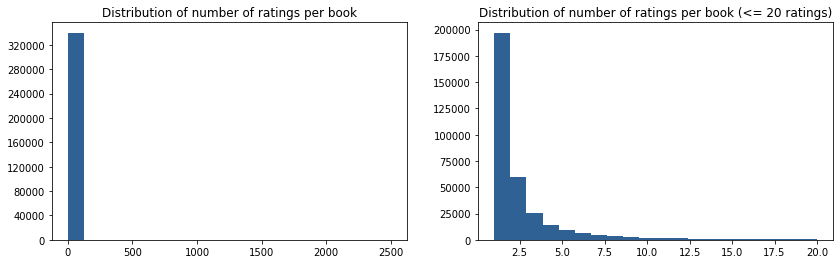

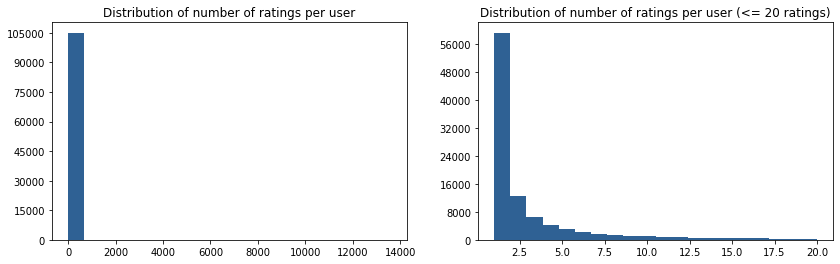

In [16]:
draw_distribution_full(dist_book,'book')
draw_distribution_full(dist_user,'user')

In [17]:
dist_user.max()

User-ID    278854
count       13602
dtype: int64

In [19]:
ratings.head()

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


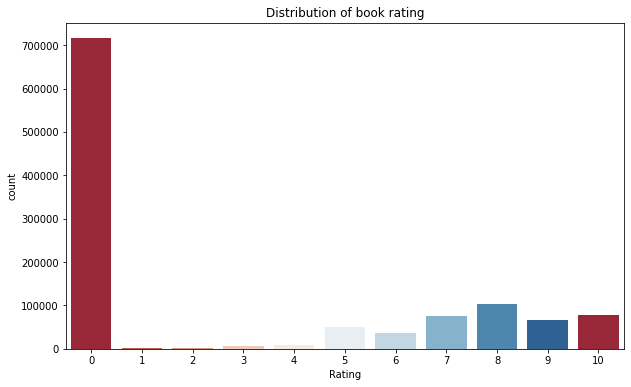

In [21]:
pallate=sns.color_palette("RdBu",10)


fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(x='Rating',data=ratings,palette=pallate)
ax.set_title('Distribution of book rating')
plt.show()

In [24]:
ratings_b=ratings.merge(books,on='ISBN',how='left')

In [25]:
ratings_b.head()

,User-ID,ISBN,Rating,Title,Author,Year,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press


In [29]:
def books_groupby(df,column,new_colname):
    df_groupby = df.groupby(column).agg({'ISBN': 'count', 'Rating': 'mean'}).reset_index()
    df_groupby.columns=[new_colname,'count','avg_rating']
    return df_groupby

In [30]:
df_books_year=books_groupby(ratings_b,'Year','year')
df_books_year=df_books_year[df_books_year['year'].between(1950,2004)]
df_books_year['year']=df_books_year['year'].astype(int)

In [31]:
df_books_year.head()

,year,count,avg_rating
47,1950,64,3.390625
48,1951,98,3.316327
49,1952,79,4.556962
50,1953,541,3.611830
51,1954,239,3.112971


/tmp/ipykernel_60651/2684939674.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year', y='avg_rating', data=df_books_year, palette=palette, ax=ax1)
/home/himangsu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/himangsu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


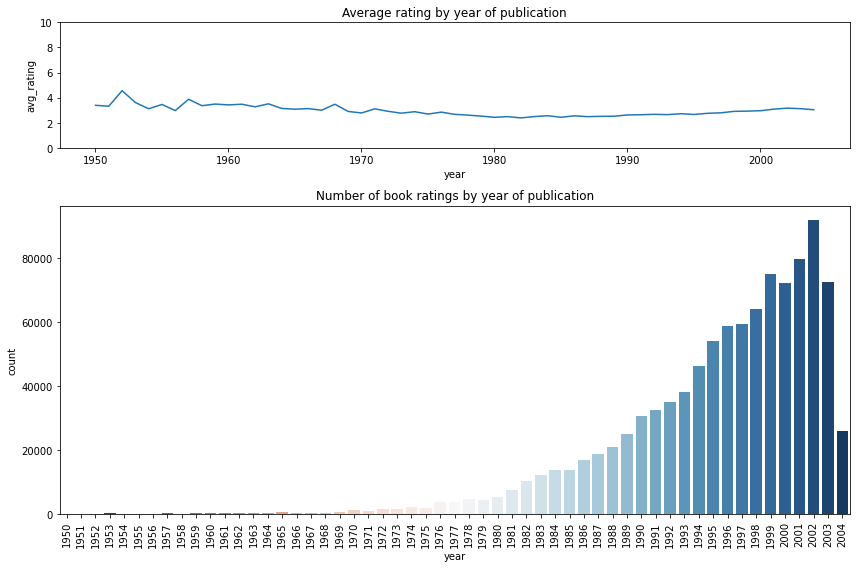

In [32]:
palette = sns.color_palette("RdBu", len(df_books_year['year'].unique()))

gridsize = (3, 1)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=2)

sns.lineplot(x='year', y='avg_rating', data=df_books_year, palette=palette, ax=ax1)
ax1.set_title('Average rating by year of publication')
ax1.set_ylim([0,10])

sns.barplot(x='year', y='count', data=df_books_year, palette=palette, ax=ax2)
ax2.set_title('Number of book ratings by year of publication')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [52]:
def short_title(title,max_len=40):
    title=str(title).split(' ')
    short_title=''

    for i in range(len(title)):
        if len(short_title)<max_len:
            short_title = ' '.join([short_title, title[i]])
    short_title=short_title.strip()
    return short_title

In [53]:
# def short_title(title, max_len=40):
#     title = str(title).split(' ')
#     short_title = ''

#     for i in range(len(title)):
#         if len(short_title) < max_len:
#             short_title = ' '.join([short_title, title[i]])
#     short_title = short_title.strip()
#     return short_title

In [54]:
df_books_title=books_groupby(ratings_b,"Title",'title')
df_books_title['short_title']=df_books_title['title'].apply(short_title)

In [55]:
df_books_title

,title,count,avg_rating,short_title
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000,A Light in the Storm: The Civil War Diary
1,Always Have Popsicles,1,0.000000,Always Have Popsicles
2,Apple Magic (The Collector's series),1,0.000000,Apple Magic (The Collector's series)
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,"Ask Lily (Young Women of Faith: Lily Series,"
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000,Beyond IBM: Leadership Marketing and Finance
...,...,...,...,...
241085,Ã?Â?lpiraten.,2,0.000000,Ã?Â?lpiraten.
241086,Ã?Â?rger mit Produkt X. Roman.,4,5.250000,Ã?Â?rger mit Produkt X. Roman.
241087,Ã?Â?sterlich leben.,1,7.000000,Ã?Â?sterlich leben.
241088,Ã?Â?stlich der Berge.,3,2.666667,Ã?Â?stlich der Berge.


In [56]:
def draw_top_chart(data, x, y_list, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    plt.xticks(rotation=90)

    palette = sns.color_palette("RdBu", len(data))

    sns.barplot(x=x, y=y_list[0], data=data, palette=palette, ax=ax1)
    ax1.set_title(title)

    ax2 = ax1.twinx()
    sns.scatterplot(x=x, y=y_list[1], data=data, color='black', ax=ax2)

    plt.show()

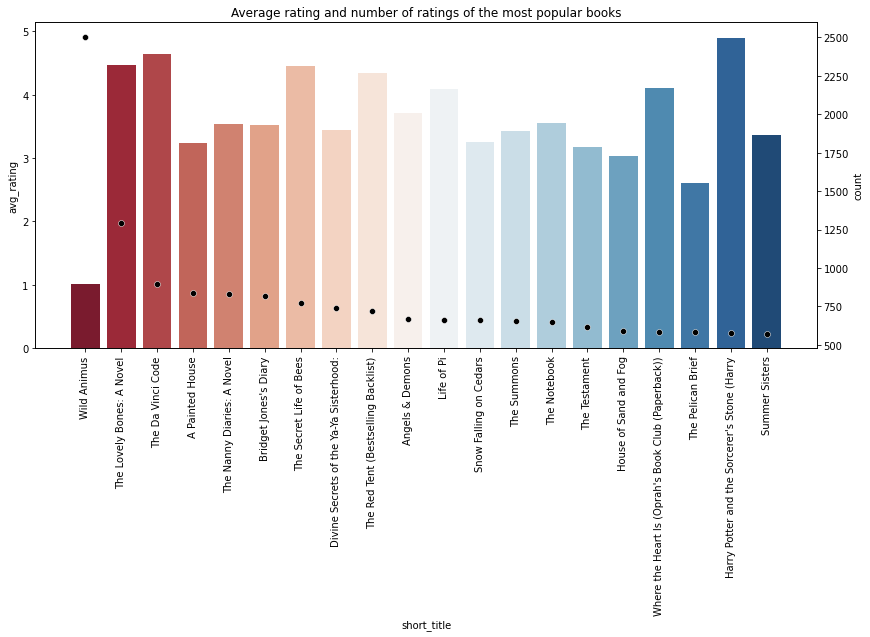

In [59]:
titles_top_popular = df_books_title.sort_values('count', ascending=False).head(20)
draw_top_chart(titles_top_popular, 'short_title', ['avg_rating', 'count'], 'Average rating and number of ratings of the most popular books')

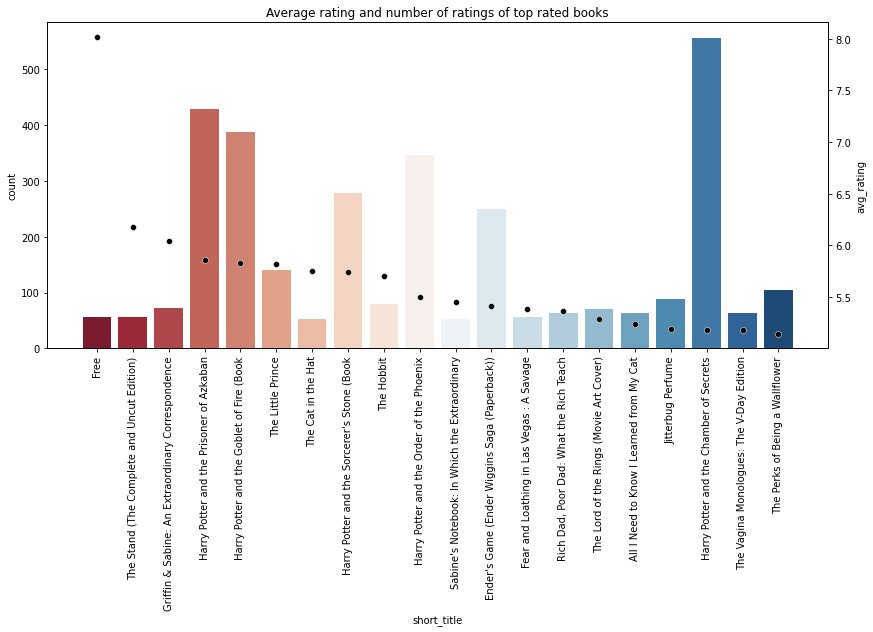

In [61]:
titles_top_rated = df_books_title.sort_values('avg_rating', ascending=False)
titles_top_rated = titles_top_rated[titles_top_rated['count']>=50].head(20)

draw_top_chart(titles_top_rated, 'short_title', ['count', 'avg_rating'], 'Average rating and number of ratings of top rated books')

In [63]:
ratings_b

,User-ID,ISBN,Rating,Title,Author,Year,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149787,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149788,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149789,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149790,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


In [64]:
df_books_author = books_groupby(ratings_b, 'Author', 'author')

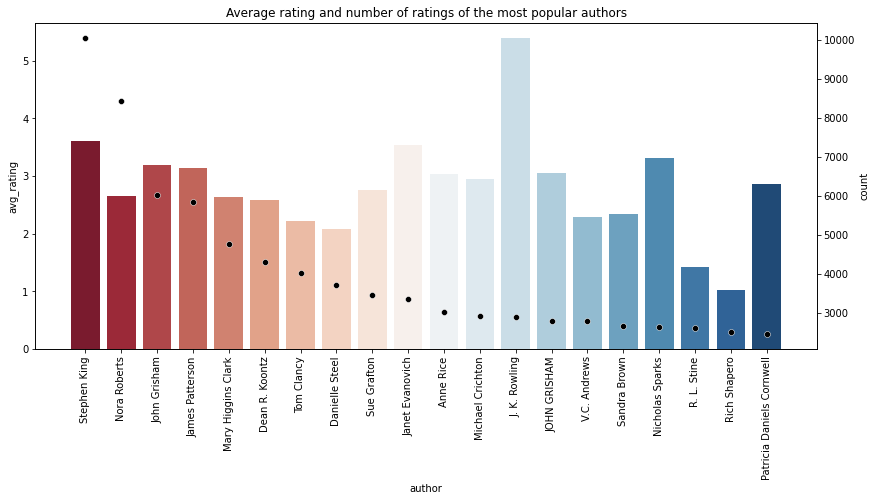

In [65]:
authors_top_popular = df_books_author.sort_values('count', ascending=False).head(20)
draw_top_chart(authors_top_popular, 'author', ['avg_rating', 'count'], 'Average rating and number of ratings of the most popular authors')

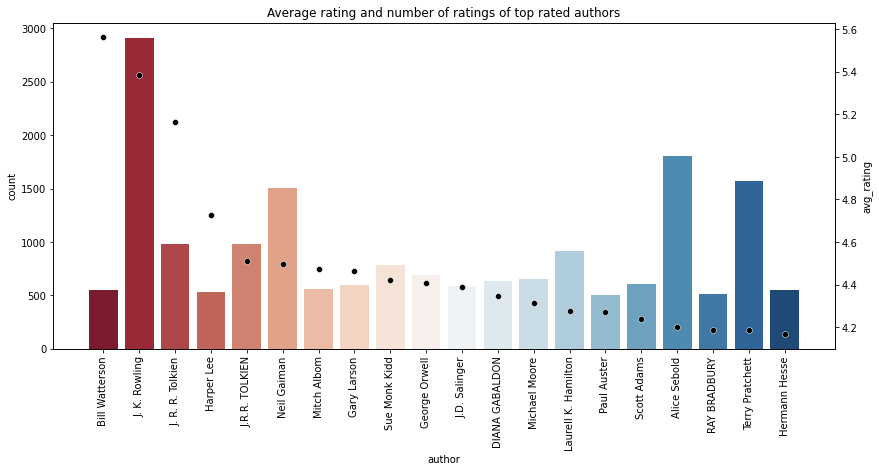

In [66]:
authors_top_rated = df_books_author.sort_values('avg_rating', ascending=False)
authors_top_rated = authors_top_rated[authors_top_rated['count']>=500].head(20)

draw_top_chart(authors_top_rated, 'author', ['count', 'avg_rating'], 'Average rating and number of ratings of top rated authors')

In [76]:
df_ratings_u = ratings.merge(users, on='User-ID', how='left')
df_ratings_u['age_round'] = df_ratings_u['Age'].round(-1)

In [79]:
df_ratings_u

,User-ID,ISBN,Rating,Age,age_round
0,276725,034545104X,0,NaN,NaN
1,276726,0155061224,5,NaN,NaN
2,276727,0446520802,0,NaN,NaN
3,276729,052165615X,3,NaN,NaN
4,276729,0521795028,6,NaN,NaN
...,...,...,...,...,...
1149775,276704,1563526298,9,NaN,NaN
1149776,276706,0679447156,0,NaN,NaN
1149777,276709,0515107662,10,NaN,NaN
1149778,276721,0590442449,10,NaN,NaN
